<a href="https://colab.research.google.com/github/marianwitkowski/python-ml/blob/master/knn-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Klasyfikacja wielokategoryczna
## Algorytm K-najbliższych sąsiadów na potrzeby procesu rozpoznawania odręcznie pisanych cyfr

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Załaduj zbiór danych MNIST

In [0]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

## Wyświetl przykładową cyfrę

In [4]:
np.set_printoptions(linewidth=160)
mnist.data[0].reshape(28,28).astype('int')

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

(-0.5, 27.5, 27.5, -0.5)

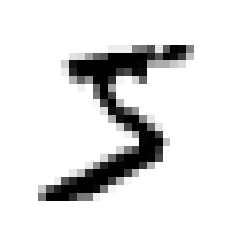

In [5]:
plt.imshow(mnist.data[0].reshape(28,28), cmap='gray_r')
plt.axis('off')

## Podział zbiorów na treningowy i testowy

In [0]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=0)

## Uczenie modelu

In [7]:
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Określenie predykcji i precyzji modelu dla testowego podzbioru danych

In [8]:
rand_index = np.unique( np.random.randint(0, len(y_test), size=1000) )
y_pred = model.predict(X_test[rand_index])
accuracy = accuracy_score(y_test[rand_index], y_pred)
accuracy

0.9645464025026069

## Macierz pomyłek

In [9]:
pd.DataFrame(confusion_matrix(y_test[rand_index], y_pred))

,0,1,2,3,4,5,6,7,8,9
0,83,0,0,0,0,0,0,0,0,0
1,0,111,1,0,0,0,0,0,0,0
2,0,2,92,0,0,0,0,3,0,0
3,0,1,2,103,0,0,0,0,1,0
4,0,1,0,0,89,0,0,1,0,7
5,0,2,0,1,0,77,0,0,0,0
6,1,0,0,0,0,1,88,0,0,0
7,0,1,0,0,0,0,0,96,0,0
8,0,1,0,2,0,0,0,1,89,0
9,0,0,0,2,2,0,0,1,0,97


In [10]:
df = pd.DataFrame(np.c_[y_test[rand_index], y_pred], columns=['TEST','PRED'])
df

,TEST,PRED
0,0,0
1,4,4
2,5,5
3,4,4
4,2,2
...,...,...
954,3,3
955,4,4
956,9,9
957,9,9


## Błędy predykcji

In [58]:
df_errors = df[df.TEST!=df.PRED]
df_errors.head(10)

,TEST,PRED
15,8,3
35,4,9
106,4,7
123,4,9
179,8,3
199,3,8
265,8,7
272,2,1
333,2,7
334,3,1


## Prezentacja kilku źle skasyfikowanych wartości ze zbioru testowego

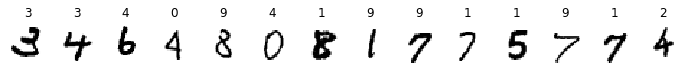

In [59]:
probes = df_errors.sample(n=15)

plt.figure(figsize=(13,13))
for i in range(1,15):
  row = probes.iloc[i, :]
  plt.subplot(1,15, i)
  plt.axis('off')
  plt.imshow(X_test[row.name].reshape(28,28), cmap='gray_r')
  plt.title(row.PRED, c='black')
plt.show()
